## Step1. Data Collection

In [421]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Step2. Data Exploration

In [422]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [423]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [424]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


<AxesSubplot: xlabel='Survived', ylabel='count'>

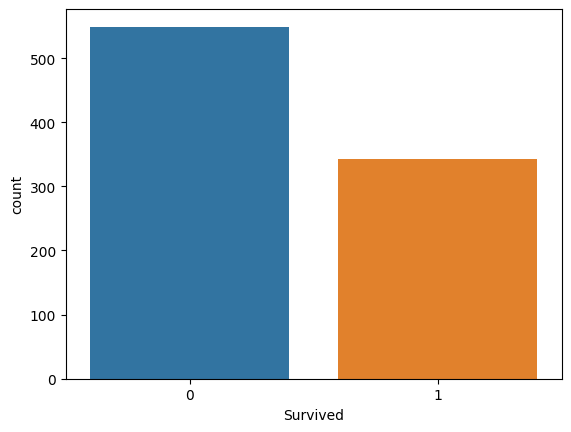

In [425]:
import seaborn as sns

sns.countplot(x='Survived', data=train)

<AxesSubplot: xlabel='Survived', ylabel='count'>

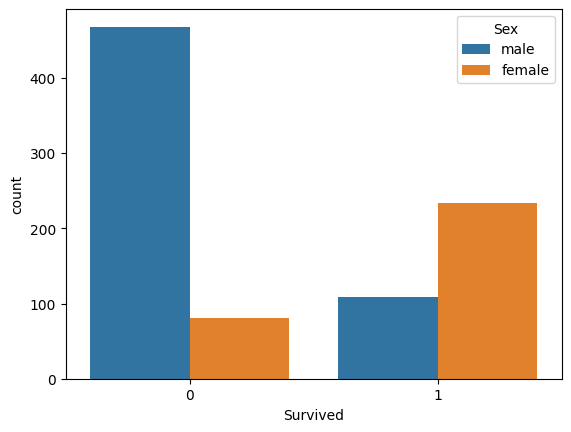

In [426]:
sns.countplot(x='Survived', hue='Sex', data=train)

## Step3. Data Cleaning

In [427]:
def DropUselessCol(df, ignorePassengerId = False):
    if ignorePassengerId :
        df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
    else:
        df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

def FillnaAge(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    
def CleanData(dfو ignorePassengerId):
    DropUselessCol(dfو ignorePassengerId)
    FillnaAge(df)
    
CleanData(train)
CleanData(test, ignorePassengerId = True)
train.head()
test.head()

SyntaxError: invalid syntax (2931306133.py, line 10)

## Step4. Feature Engineering & Data Preprocessing

In [ ]:
def convertToNumeric(df):
    sex = pd.get_dummies(df['Sex'], drop_first=True)
    df.drop(['Sex'], axis=1, inplace=True)
    df = pd.concat([df, sex], axis=1)

def castColToInt(df, name):
    df[name] = df[name].astype(int)
    
def FeatureEngineering(df):
    convertToNumeric(df)
    castColToInt(df, 'Age')
    castColToInt(df, 'Fare')
    
FeatureEngineering(train)
FeatureEngineering(test)
print(train)

## Step5. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = train.drop('Survived', axis=1)
Y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=42)

## Step6. Model Selection

sdasdas

## Step7. Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

## Step8. Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predict = logreg.predict(test)

accuracy = accuracy_score(y_test, predict)
precision = precision_score(y_test, predict)
recall = recall_score(y_test, predict)
f1 = f1_score(y_test, predict)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

## Step9. Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid = GridSearchCV(logreg, hyperparameters, cv=5)
grid.fit(X_train, y_train)

tuning_predict = grid.predict(X_test)
tuning_accuracy = accuracy_score(y_test, tuning_predict)
tuning_precision = precision_score(y_test, tuning_predict)
tuning_recall = recall_score(y_test, tuning_predict)
tuning_f1 = f1_score(y_test, tuning_predict)

print("Accuracy: {:.2f}".format(tuning_accuracy))
print("Precision: {:.2f}".format(tuning_precision))
print("Recall: {:.2f}".format(tuning_recall))
print("F1 Score: {:.2f}".format(tuning_f1))

In [ ]:
## Step10. Model Deployment

In [ ]:
tuning_predict = grid.predict(X_test)

In [ ]:
submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': tuning_predict})
submission_df.to_csv('submission.csv', index=False)